In [6]:
#imports & settings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# Matplotlib + Seaborn setup
%matplotlib inline


available_styles = plt.style.available
if "seaborn-v0_8-whitegrid" in available_styles:
    plt.style.use("seaborn-v0_8-whitegrid")
elif "ggplot" in available_styles:
    plt.style.use("ggplot")
else:
    plt.style.use("default")

sns.set_theme(style="whitegrid")
sns.set_context("talk")




In [7]:
# load dataset (safe, non-hardcoded)
# Enter the CSV path when prompted, or press Enter to try './data/youtube_monetization.csv'
default_path = Path("D:\yotube_monetizzation_project\youtube_ad_revenue_dataset.csv")

csv_path_input = input(f"Enter dataset CSV path (or press Enter to use '{default_path}'): ").strip()
if csv_path_input:
    csv_path = Path(csv_path_input)
else:
    csv_path = default_path

if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found at {csv_path}. Please provide a valid path.")

# Read CSV (small memory-friendly options if needed can be added)
df = pd.read_csv(csv_path, low_memory=False)
print(f"Loaded dataset from: {csv_path}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")



Loaded dataset from: D:\yotube_monetizzation_project\youtube_ad_revenue_dataset.csv
Rows: 122400, Columns: 12


In [8]:
#  quick data overview
def quick_overview(df, n=5):
    display(df.head(n))
    print("\nData types:")
    print(df.dtypes)
    print("\nBasic stats (numeric):")
    display(df.describe(include=[np.number]).T)
    print("\nBasic stats (object/category):")
    display(df.describe(include=[object]).T)

quick_overview(df)


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388



Data types:
video_id                 object
date                     object
views                     int64
likes                   float64
comments                float64
watch_time_minutes      float64
video_length_minutes    float64
subscribers               int64
category                 object
device                   object
country                  object
ad_revenue_usd          float64
dtype: object

Basic stats (numeric):


,count,mean,std,min,25%,50%,75%,max
views,122400.0,9999.856283,99.881260,9521.000000,9933.000000,10000.000000,10067.000000,10468.000000
likes,116283.0,1099.633618,519.424089,195.000000,650.000000,1103.000000,1547.000000,2061.000000
comments,116288.0,274.396636,129.741739,48.000000,162.000000,274.000000,387.000000,515.000000
watch_time_minutes,116295.0,37543.827721,12987.724246,14659.105562,26366.320569,37531.990337,48777.782090,61557.670089
video_length_minutes,122400.0,16.014165,8.083790,2.000142,9.004695,16.005906,23.021260,29.999799
subscribers,122400.0,502191.719902,288397.470103,1005.000000,252507.500000,503465.500000,752192.000000,999997.000000
ad_revenue_usd,122400.0,252.727210,61.957052,126.590603,199.902018,252.749699,305.597518,382.768254



Basic stats (object/category):


,count,unique,top,freq
video_id,122400,5000,vid_3033,47
date,122400,365,2025-04-03 10:50:40.993199,382
category,122400,6,Education,20514
device,122400,4,TV,30646
country,122400,6,CA,20603


In [9]:
# clean column names (normalization)
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Columns after normalization:")
print(df.columns.tolist())


Columns after normalization:
['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category', 'device', 'country', 'ad_revenue_usd']


In [10]:
#datetime conversion
# Attempt to auto-detect a 'date' column name; adjust if your date column is named differently
date_cols = [c for c in df.columns if 'date' in c]
print("Detected date-like columns:", date_cols)

for c in date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
        print(f"Converted {c} to datetime. Nulls after convert: {df[c].isna().sum()}")
    except Exception as e:
        print(f"Could not convert {c}: {e}")




Detected date-like columns: ['date']
Converted date to datetime. Nulls after convert: 0


,missing_count,missing_pct
likes,6117,4.997549
comments,6112,4.993464
watch_time_minutes,6105,4.987745
video_id,0,0.000000
views,0,0.000000
date,0,0.000000
video_length_minutes,0,0.000000
subscribers,0,0.000000
category,0,0.000000
device,0,0.000000


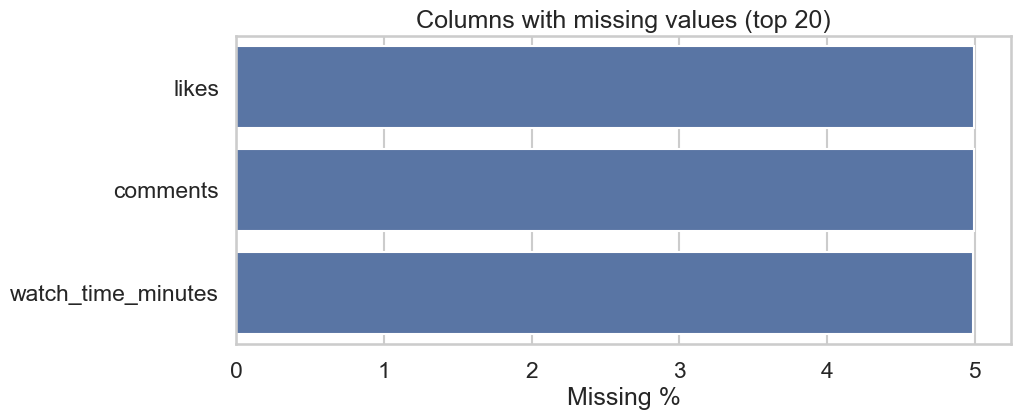

In [11]:
#  missing values summary
def missing_report(df):
    miss = df.isna().sum().rename("missing_count").to_frame()
    miss['missing_pct'] = miss['missing_count'] / len(df) * 100
    miss = miss.sort_values('missing_pct', ascending=False)
    return miss

missing = missing_report(df)
display(missing)

# Visualize columns with missing values (top 20)
missing_top = missing[missing['missing_count'] > 0].head(20)
if not missing_top.empty:
    plt.figure(figsize=(10, max(4, 0.25*len(missing_top))))
    sns.barplot(x='missing_pct', y=missing_top.index, data=missing_top.reset_index().rename(columns={'index':'col'}))
    plt.xlabel("Missing %")
    plt.ylabel("")
    plt.title("Columns with missing values (top 20)")
    plt.show()
else:
    print("No missing values detected.")


In [12]:
# duplicate detection and overview
dup_count = df.duplicated().sum()
print(f"Total exact duplicate rows: {dup_count} ({dup_count/len(df):.2%})")

# Inspect duplicates by likely unique index: video_id + date (if both exist)
if 'video_id' in df.columns and any('date' in c for c in df.columns):
    # choose first date-like column
    date_col = [c for c in df.columns if 'date' in c][0]
    group_dups = df.duplicated(subset=['video_id', date_col]).sum()
    print(f"Duplicates by (video_id, {date_col}): {group_dups} ({group_dups/len(df):.2%})")
else:
    print("video_id and/or date column not found to perform group duplicate check.")



Total exact duplicate rows: 2400 (1.96%)
Duplicates by (video_id, date): 6249 (5.11%)


Numeric columns detected: ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']


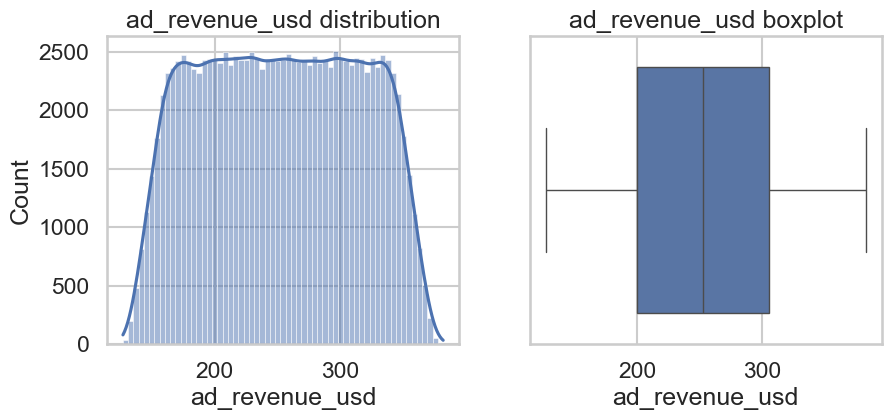

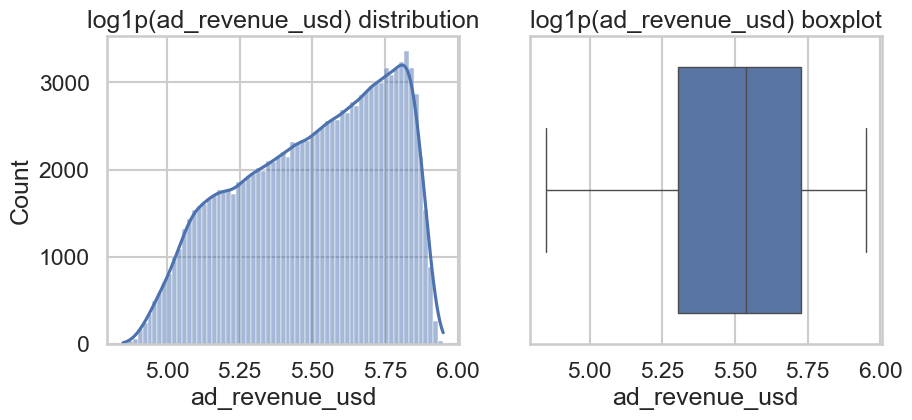

Top numeric skew values (positive):


comments                0.007735
watch_time_minutes      0.000903
ad_revenue_usd          0.000447
video_length_minutes   -0.001493
views                  -0.002758
likes                  -0.002758
subscribers            -0.008934
dtype: float64

In [13]:
# univariate distributions & skewness check
target = 'ad_revenue_usd'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeric columns detected:", numeric_cols)
if target not in numeric_cols:
    print(f"Warning: target '{target}' not found in numeric columns. Check column name.")
else:
    # Target distribution
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[target].dropna(), kde=True)
    plt.title(f"{target} distribution")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[target].dropna())
    plt.title(f"{target} boxplot")
    plt.show()

    # Log-transform visualization (helpful for skewed targets)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(np.log1p(df[target].dropna()), kde=True)
    plt.title(f"log1p({target}) distribution")

    plt.subplot(1,2,2)
    sns.boxplot(x=np.log1p(df[target].dropna()))
    plt.title(f"log1p({target}) boxplot")
    plt.show()

# Basic skewness for numeric columns
skews = df[numeric_cols].skew().sort_values(ascending=False).head(20)
print("Top numeric skew values (positive):")
display(skews.head(10))


Non-numeric (object) columns and sample values (first 5):

- video_id (unique=5000):


array(['vid_3092', 'vid_3459', 'vid_4784', 'vid_4078', 'vid_3522'],
      dtype=object)


- category (unique=6):


array(['Entertainment', 'Gaming', 'Education', 'Music', 'Tech'],
      dtype=object)


- device (unique=4):


array(['TV', 'Tablet', 'Mobile', 'Desktop'], dtype=object)


- country (unique=6):


array(['IN', 'CA', 'UK', 'US', 'DE'], dtype=object)


Numeric columns used for correlation (count: 7): ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']

Top correlations with target:


,corr_with_target
watch_time_minutes,0.988874
likes,0.146449
views,0.038497
comments,0.034274
subscribers,0.005907
video_length_minutes,-0.000446



Most negative correlations with target:


,corr_with_target
watch_time_minutes,0.988874
likes,0.146449
views,0.038497
comments,0.034274
subscribers,0.005907
video_length_minutes,-0.000446


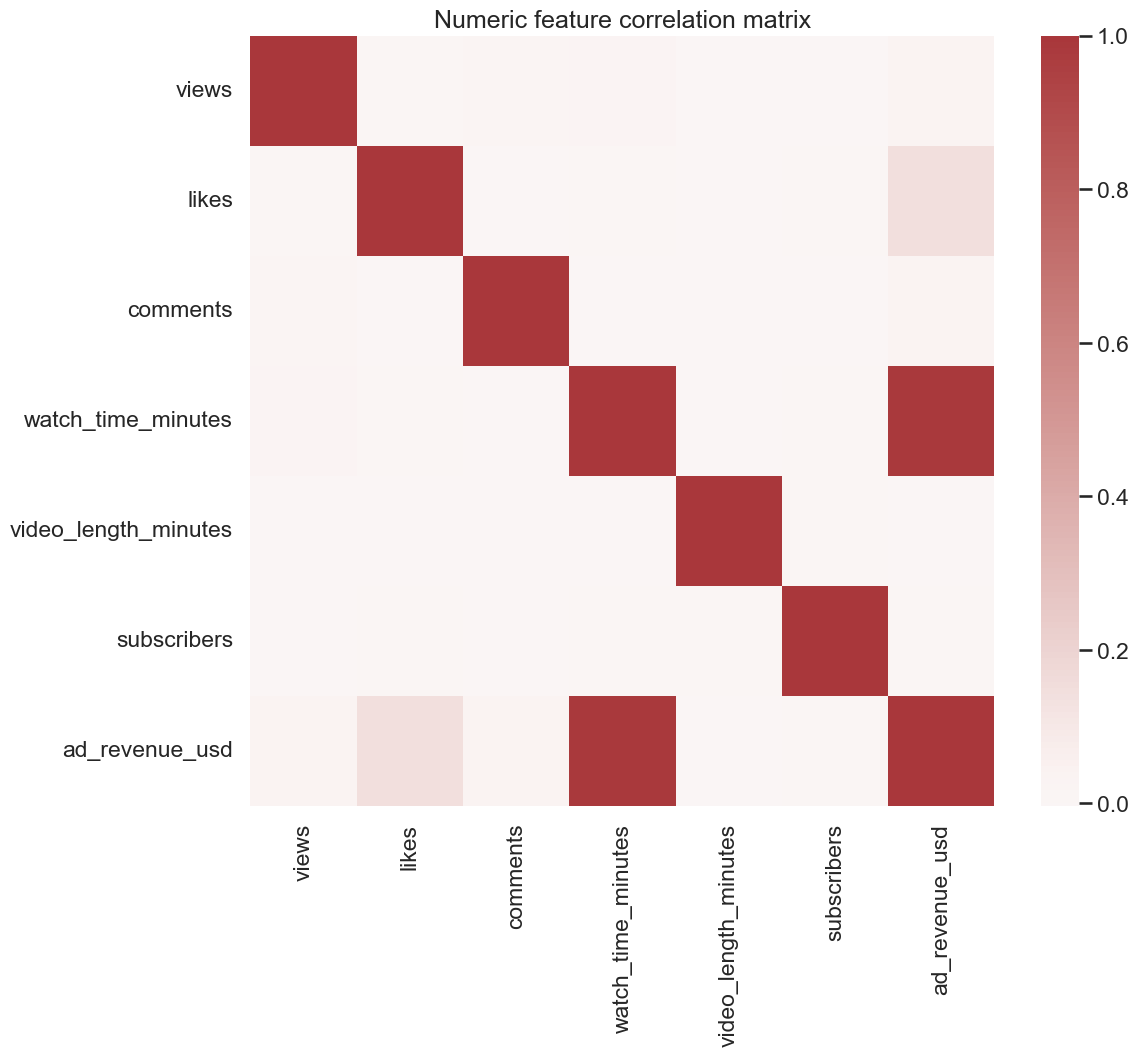

In [14]:
# safe correlation analysis (only numeric columns)
target = 'ad_revenue_usd'  # ensure this matches your dataset column name

# Show object / non-numeric columns and a sample of their values (helpful debug)
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
if obj_cols:
    print("Non-numeric (object) columns and sample values (first 5):")
    for c in obj_cols:
        print(f"\n- {c} (unique={df[c].nunique()}):")
        display(df[c].dropna().astype(str).unique()[:5])
else:
    print("No object columns detected.")

# Ensure the target column exists
if target not in df.columns:
    raise KeyError(f"Target column '{target}' not found in DataFrame columns: {df.columns.tolist()}")

# Try to coerce the target to numeric if it's not already numeric (safe: don't overwrite original)
if not pd.api.types.is_numeric_dtype(df[target]):
    print(f"Target '{target}' is not numeric. Attempting to coerce to numeric (errors -> NaN).")
    df[f"{target}_numeric"] = pd.to_numeric(df[target], errors='coerce')
    target_numeric = f"{target}_numeric"
    coerced_nulls = df[target_numeric].isna().sum()
    print(f"After coercion, nulls in coerced target: {coerced_nulls} / {len(df)}")
else:
    target_numeric = target

# Build numeric-only DataFrame for correlations (drop columns that are entirely non-numeric)
numeric_df = df.select_dtypes(include=[np.number]).copy()
print(f"\nNumeric columns used for correlation (count: {len(numeric_df.columns)}): {numeric_df.columns.tolist()}")

# Ensure coerced/target numeric is present
if target_numeric not in numeric_df.columns:
    raise ValueError(f"Numeric target '{target_numeric}' not in numeric columns. Check coercion step.")

# Compute correlations with target and display
corr_matrix = numeric_df.corr()
corr_target = corr_matrix[target_numeric].drop(target_numeric).sort_values(ascending=False)
print("\nTop correlations with target:")
display(corr_target.head(20).to_frame(name='corr_with_target'))

print("\nMost negative correlations with target:")
display(corr_target.tail(20).to_frame(name='corr_with_target'))

# Visual: numeric correlation matrix heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='vlag', center=0)
plt.title("Numeric feature correlation matrix")
plt.show()


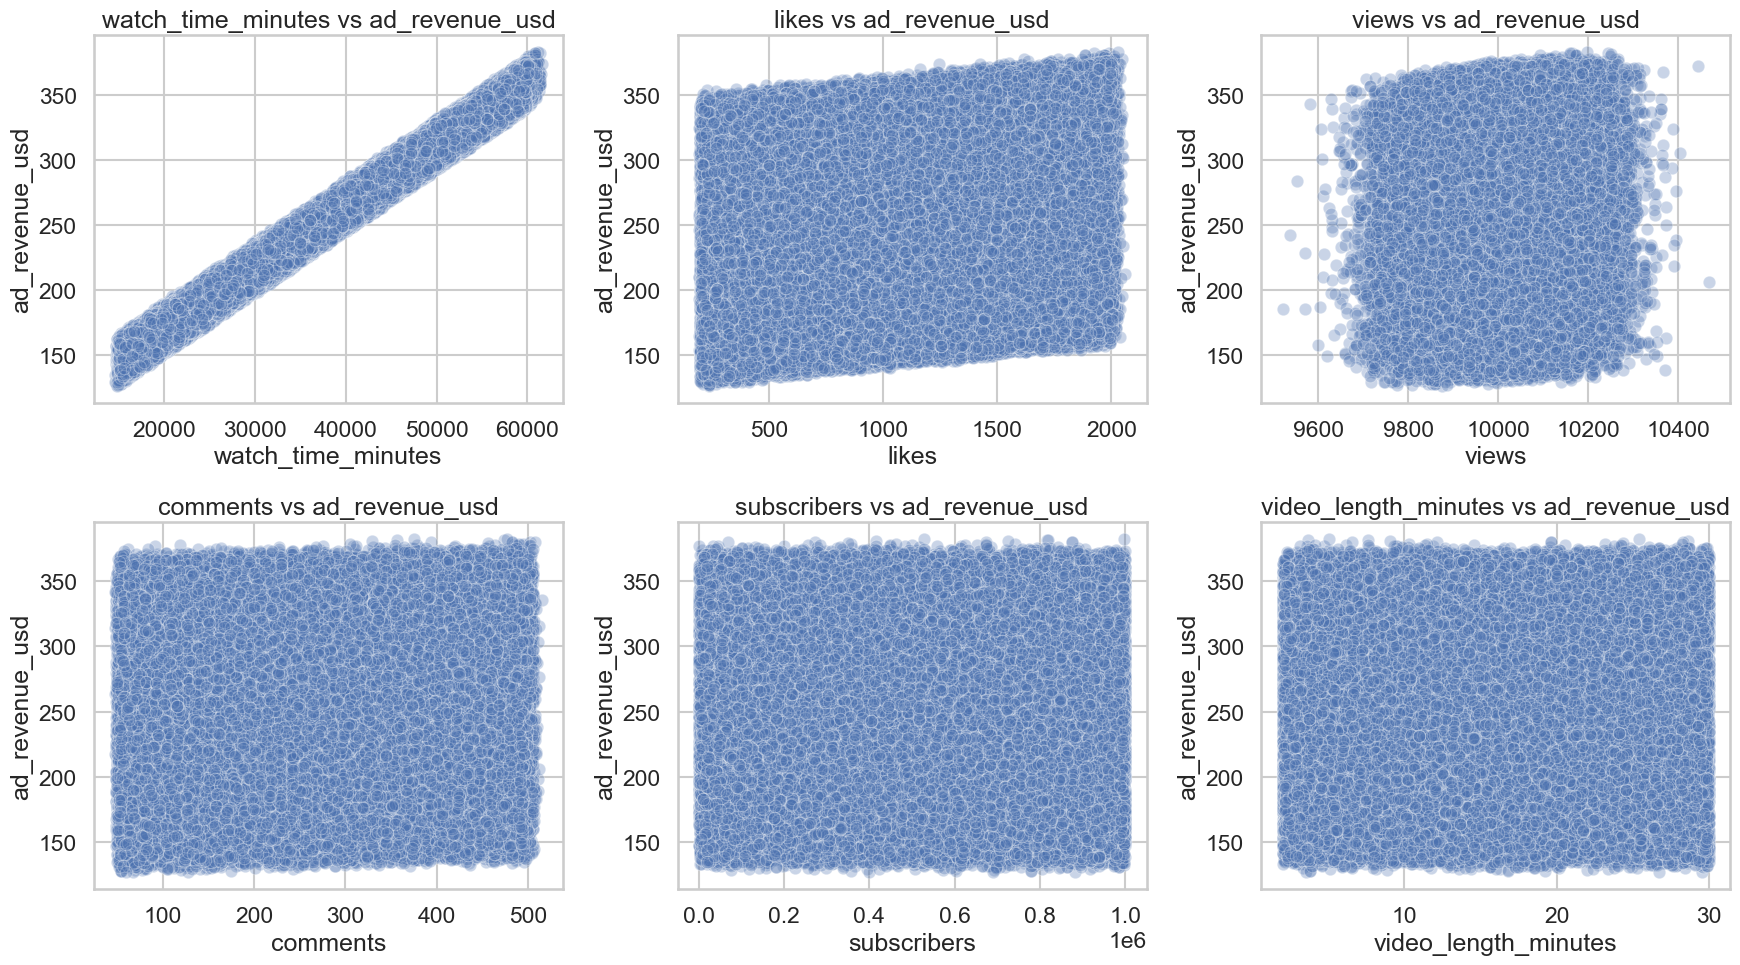

In [15]:
# Bigger scatter plots with 2x3 grid layout
if target in df.columns:
    top_feats = corr_target.abs().sort_values(ascending=False).head(6).index.tolist()

    rows, cols = 2, 3
    plt.figure(figsize=(18, 10))

    for i, f in enumerate(top_feats, 1):
        plt.subplot(rows, cols, i)
        sns.scatterplot(x=df[f], y=df[target], alpha=0.3)
        plt.xlabel(f)
        plt.ylabel(target)
        plt.title(f"{f} vs {target}")

    plt.tight_layout()
    plt.show()


Potential categorical columns: ['video_id', 'category', 'device', 'country']

Column: video_id (unique: 5000)


video_id
vid_3033    47
vid_1725    43
vid_2512    43
vid_4483    42
vid_4840    42
vid_2666    42
vid_988     41
vid_4310    41
vid_4714    41
vid_2429    40
Name: count, dtype: int64

,count,mean,median
video_id,,,
vid_3033,47,253.936550,263.208058
vid_1725,43,234.339162,219.787558
vid_2512,43,244.563622,246.936235
vid_2666,42,251.349156,252.745127
vid_4840,42,265.895632,285.142768
vid_4483,42,238.594009,221.001179
vid_4310,41,259.279601,255.943572
vid_988,41,263.804577,273.274906
vid_4714,41,258.206963,272.493477


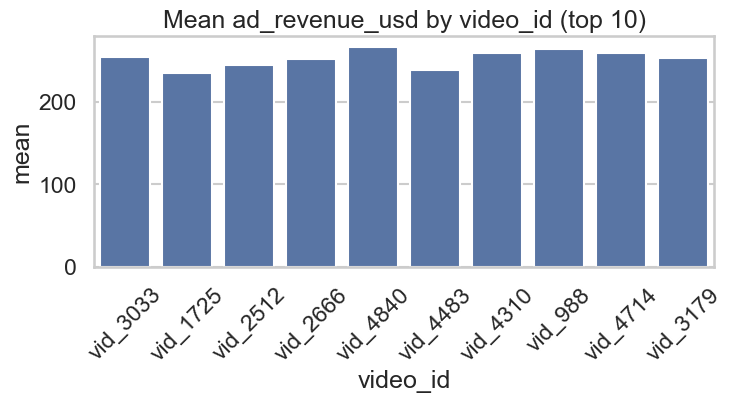


Column: category (unique: 6)


category
Education        20514
Music            20475
Tech             20444
Entertainment    20411
Gaming           20359
Lifestyle        20197
Name: count, dtype: int64

,count,mean,median
category,,,
Education,20514,252.481643,251.893548
Music,20475,252.587527,252.701239
Tech,20444,253.473340,253.767682
Entertainment,20411,252.445854,251.938448
Gaming,20359,253.507619,254.102671
Lifestyle,20197,251.860649,251.794007


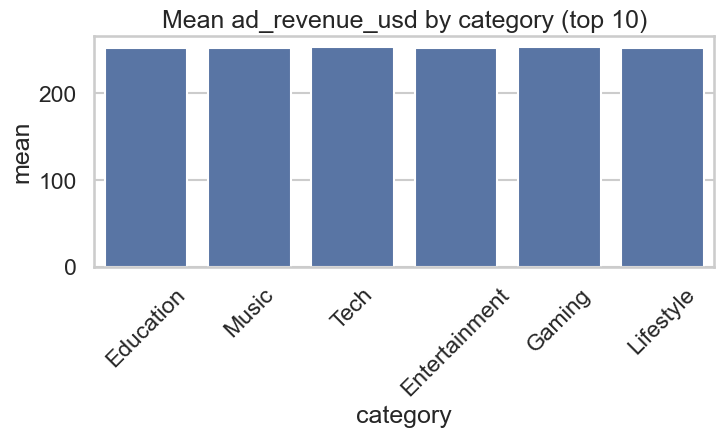


Column: device (unique: 4)


device
TV         30646
Mobile     30598
Tablet     30579
Desktop    30577
Name: count, dtype: int64

,count,mean,median
device,,,
TV,30646,252.287189,252.160775
Mobile,30598,253.275517,253.761875
Tablet,30579,253.005502,252.837821
Desktop,30577,252.341229,252.062364


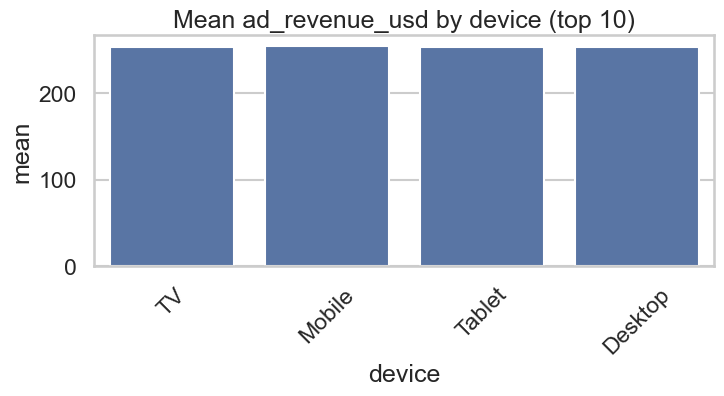


Column: country (unique: 6)


country
CA    20603
DE    20582
IN    20564
AU    20313
UK    20269
US    20069
Name: count, dtype: int64

,count,mean,median
country,,,
CA,20603,252.817583,252.970353
DE,20582,252.745599,252.966481
IN,20564,252.598216,252.283541
AU,20313,252.539689,252.724805
UK,20269,252.452118,251.600354
US,20069,253.215380,253.540303


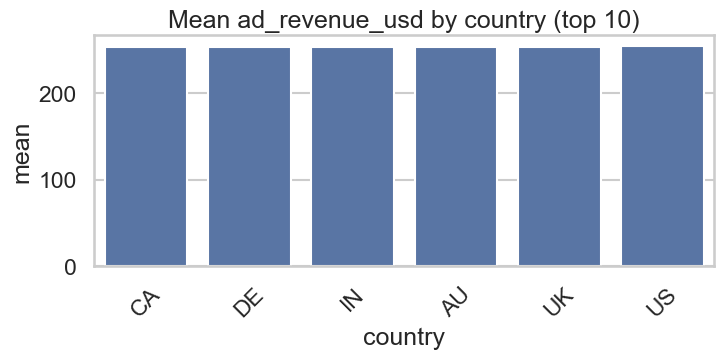

In [16]:
#examine categorical features and ad_revenue by category
cat_cols = [c for c in df.columns if df[c].dtype == 'object' or df[c].nunique() < 50 and c not in numeric_cols]

print("Potential categorical columns:", cat_cols)

for c in cat_cols:
    print(f"\nColumn: {c} (unique: {df[c].nunique()})")
    display(df[c].value_counts().head(10))
    if target in df.columns:
        # avg revenue by category (top 10)
        grp = df.groupby(c)[target].agg(['count', 'mean', 'median']).sort_values('count', ascending=False).head(10)
        display(grp)
        plt.figure(figsize=(8,3))
        sns.barplot(x=grp.index, y=grp['mean'])
        plt.xticks(rotation=45)
        plt.title(f"Mean {target} by {c} (top 10)")
        plt.show()


In [17]:
# Save a short EDA report (missing + basic stats) to file for reference
report = missing.reset_index().rename(columns={'index':'column'})
if 'video_id' in df.columns:
    report.loc[report['column']=='video_id', 'note'] = 'identifier'
# Simple numeric summary for top numeric cols
numeric_summary = df[numeric_cols].describe().T.reset_index().rename(columns={'index':'column'})
eda_report = pd.merge(report, numeric_summary, on='column', how='left')
out_path = Path("eda_report_summary.csv")
eda_report.to_csv(out_path, index=False)
print(f"EDA summary saved to {out_path.resolve()}")


EDA summary saved to D:\yotube_monetizzation_project\eda_report_summary.csv


In [18]:
# Short interactive checklist (print)
print("EDA Step 1 complete. Quick checklist:")
print("- [ ] Confirm date columns converted correctly (check nulls in date columns).")
print("- [ ] Review missing_report (Cell 6) and decide imputation strategy.")
print("- [ ] Decide treatment for duplicates (Cell 7).")
print("- [ ] Inspect skewed variables (Cell 8) and consider log-transform for modeling.")
print("- [ ] Review top correlations (Cell 9) and top numerical predictors (Cell 10).")
print("- [ ] Note categorical cardinality (Cell 11) for encoding choices.")
print("\nNext recommended actions: Create feature engineering cell (engagement rate, watch_time_per_view), then preprocessing pipeline.")


EDA Step 1 complete. Quick checklist:
- [ ] Confirm date columns converted correctly (check nulls in date columns).
- [ ] Review missing_report (Cell 6) and decide imputation strategy.
- [ ] Decide treatment for duplicates (Cell 7).
- [ ] Inspect skewed variables (Cell 8) and consider log-transform for modeling.
- [ ] Review top correlations (Cell 9) and top numerical predictors (Cell 10).
- [ ] Note categorical cardinality (Cell 11) for encoding choices.

Next recommended actions: Create feature engineering cell (engagement rate, watch_time_per_view), then preprocessing pipeline.


In [19]:
# Feature engineering (engagement_rate, watch_time_per_view, views_per_day, view_length_ratio, likes_per_view, comments_per_view)
from pandas.api.types import is_numeric_dtype

def create_feature_engineering(df, inplace=False, date_col_candidate=None):
    """
    Adds engineered features to a copy of df and returns new DataFrame.
    - engagement_rate = (likes + comments) / views
    - watch_time_per_view = watch_time_minutes / views
    - likes_per_view, comments_per_view
    - view_length_ratio = watch_time_minutes / video_length_minutes
    - views_per_day = views / max(1, video_age_days) if upload/report dates available
    """
    if not inplace:
        df = df.copy()
    # Ensure numeric columns exist (coerce if necessary)
    numeric_cols_expected = ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']
    for col in numeric_cols_expected:
        if col in df.columns and not is_numeric_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Safe helper to divide producing NaN when denom is 0 or NaN
    def safe_div(n, d):
        return np.where((d == 0) | (pd.isna(d)), np.nan, n / d)

    # Engagement features
    if 'views' in df.columns:
        df['engagement_rate'] = safe_div(df.get('likes', 0) + df.get('comments', 0), df['views'])
        df['likes_per_view'] = safe_div(df.get('likes', np.nan), df['views'])
        df['comments_per_view'] = safe_div(df.get('comments', np.nan), df['views'])
        df['watch_time_per_view'] = safe_div(df.get('watch_time_minutes', np.nan), df['views'])
    else:
        df['engagement_rate'] = np.nan
        df['likes_per_view'] = np.nan
        df['comments_per_view'] = np.nan
        df['watch_time_per_view'] = np.nan

    # view_length_ratio
    if 'watch_time_minutes' in df.columns and 'video_length_minutes' in df.columns:
        df['view_length_ratio'] = safe_div(df['watch_time_minutes'], df['video_length_minutes'])
    else:
        df['view_length_ratio'] = np.nan

    # video age and views per day — attempt to detect date columns
    date_cols = [c for c in df.columns if 'date' in c]
    if date_cols:
        # pick the earliest likely: prefer 'upload_date' else first date-like col
        if 'upload_date' in df.columns and any('report' in c for c in date_cols):
            upload_col = 'upload_date'
            report_col = [c for c in date_cols if c != upload_col][0]
        else:
            # if only one date col, assume it's report_date; video_age_days unknown
            upload_col = None
            report_col = date_cols[0]

        if upload_col and upload_col in df.columns and report_col in df.columns:
            # compute video age days 
            df['video_age_days'] = (pd.to_datetime(df[report_col], errors='coerce') - pd.to_datetime(df[upload_col], errors='coerce')).dt.days
            # avoid zeros/negatives
            df['video_age_days'] = df['video_age_days'].apply(lambda x: x if pd.notna(x) and x > 0 else np.nan)
            if 'views' in df.columns:
                df['views_per_day'] = safe_div(df['views'], df['video_age_days'])
            else:
                df['views_per_day'] = np.nan
        else:
            df['video_age_days'] = np.nan
            df['views_per_day'] = np.nan
    else:
        df['video_age_days'] = np.nan
        df['views_per_day'] = np.nan

    # Binary long video flag
    if 'video_length_minutes' in df.columns:
        df['is_long_video'] = (df['video_length_minutes'] > 20).astype('int')  # threshold 20 min; adjust if you want
    else:
        df['is_long_video'] = 0

    return df

# Apply feature engineering 
df_fe = create_feature_engineering(df, inplace=False)
print("Feature engineering complete. New columns:")
new_cols = [c for c in df_fe.columns if c not in df.columns]
print(new_cols)
display(df_fe.head(3))


Feature engineering complete. New columns:
['engagement_rate', 'likes_per_view', 'comments_per_view', 'watch_time_per_view', 'view_length_ratio', 'video_age_days', 'views_per_day', 'is_long_video']


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement_rate,likes_per_view,comments_per_view,watch_time_per_view,view_length_ratio,video_age_days,views_per_day,is_long_video
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093,0.122886,0.032206,2.666789,9257.844017,NaN,NaN,0
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632,0.064091,0.034541,1.518393,640.732307,NaN,NaN,1
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519,0.195999,0.018520,5.678187,2188.216490,NaN,NaN,1


engagement_rate: non-null 110480 / 122400 — dtype: float64
likes_per_view: non-null 116283 / 122400 — dtype: float64
comments_per_view: non-null 116288 / 122400 — dtype: float64
watch_time_per_view: non-null 116295 / 122400 — dtype: float64
view_length_ratio: non-null 116295 / 122400 — dtype: float64
views_per_day: non-null 0 / 122400 — dtype: float64
video_age_days: non-null 0 / 122400 — dtype: float64
is_long_video: non-null 122400 / 122400 — dtype: int64


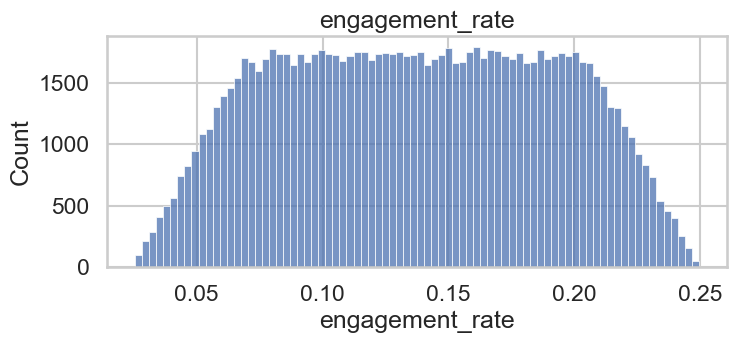

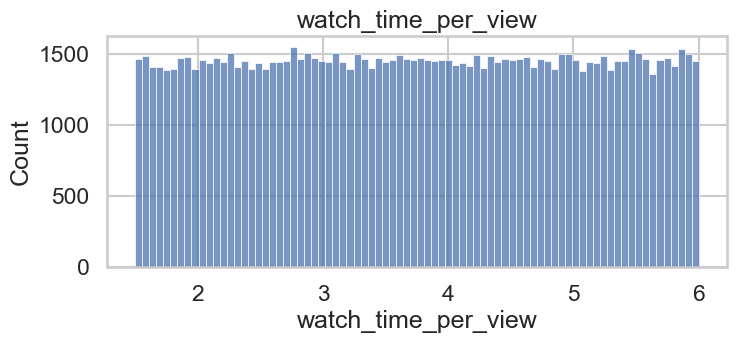

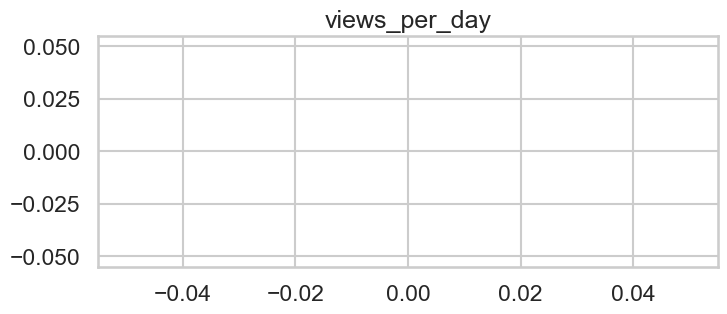

In [20]:
# sanity checks for engineered columns
eng_cols = ['engagement_rate','likes_per_view','comments_per_view','watch_time_per_view','view_length_ratio','views_per_day','video_age_days','is_long_video']
for c in eng_cols:
    if c in df_fe.columns:
        print(f"{c}: non-null {df_fe[c].notna().sum()} / {len(df_fe)} — dtype: {df_fe[c].dtype}")
    else:
        print(f"{c}: MISSING")
# Quick histograms for a few created features
plot_cols = [c for c in ['engagement_rate','watch_time_per_view','views_per_day'] if c in df_fe.columns]
for c in plot_cols:
    plt.figure(figsize=(8,3))
    sns.histplot(df_fe[c].dropna(), kde=False, bins=80)
    plt.title(c)
    plt.show()


In [21]:
#  Feature engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# ML imports
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import GroupShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# ---------- Feature engineering helper (assumes df already loaded) ----------
def create_feature_engineering(df, inplace=False):
    if not inplace:
        df = df.copy()
    numeric_cols_expected = ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd']
    for col in numeric_cols_expected:
        if col in df.columns and not pd.api.types.is_numeric_dtype(df[col]):
            df[col] = pd.to_numeric(df[col], errors='coerce')

    def safe_div(n, d):
        n_arr = np.array(n, dtype='float64')
        d_arr = np.array(d, dtype='float64')
        out = np.full_like(n_arr, np.nan, dtype='float64')
        mask = (~np.isnan(d_arr)) & (d_arr != 0)
        out[mask] = n_arr[mask] / d_arr[mask]
        return out

    if 'views' in df.columns:
        df['engagement_rate'] = safe_div(df.get('likes', 0) + df.get('comments', 0), df['views'])
        df['likes_per_view'] = safe_div(df.get('likes', np.nan), df['views'])
        df['comments_per_view'] = safe_div(df.get('comments', np.nan), df['views'])
        df['watch_time_per_view'] = safe_div(df.get('watch_time_minutes', np.nan), df['views'])
    else:
        df['engagement_rate'] = np.nan
        df['likes_per_view'] = np.nan
        df['comments_per_view'] = np.nan
        df['watch_time_per_view'] = np.nan

    if 'watch_time_minutes' in df.columns and 'video_length_minutes' in df.columns:
        df['view_length_ratio'] = safe_div(df['watch_time_minutes'], df['video_length_minutes'])
    else:
        df['view_length_ratio'] = np.nan

    date_cols = [c for c in df.columns if 'date' in c]
    if date_cols:
        upload_col = 'upload_date' if 'upload_date' in df.columns else None
        report_col = None
        for c in date_cols:
            if c != upload_col:
                report_col = c
                break
        if not report_col:
            report_col = date_cols[0]

        if upload_col and upload_col in df.columns and report_col in df.columns:
            df[upload_col] = pd.to_datetime(df[upload_col], errors='coerce')
            df[report_col] = pd.to_datetime(df[report_col], errors='coerce')
            df['video_age_days'] = (df[report_col] - df[upload_col]).dt.days
            df['video_age_days'] = df['video_age_days'].apply(lambda x: x if pd.notna(x) and x > 0 else np.nan)
            if 'views' in df.columns:
                df['views_per_day'] = safe_div(df['views'], df['video_age_days'])
            else:
                df['views_per_day'] = np.nan
        else:
            df['video_age_days'] = np.nan
            df['views_per_day'] = np.nan
    else:
        df['video_age_days'] = np.nan
        df['views_per_day'] = np.nan

    if 'video_length_minutes' in df.columns:
        df['is_long_video'] = (df['video_length_minutes'] > 20).astype('int')
    else:
        df['is_long_video'] = 0

    return df


class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """
    Frequency (relative) encoder with robust stringified keys to avoid mixed-type errors.
    Ensures output column names are strings.
    """
    def __init__(self):
        self.freq_maps_ = {}
        self.columns_ = None

    def fit(self, X, y=None):
        # Accept DataFrame or array-like
        if hasattr(X, "columns"):
            X_df = X.copy()
            self.columns_ = list(X_df.columns)
        else:
            X_df = pd.DataFrame(X)
            self.columns_ = list(X_df.columns)

        for col in self.columns_:
            ser = X_df[col].fillna("___MISSING___").astype(str)
            freqs = ser.value_counts(normalize=True).to_dict()
            # store with stringified keys
            freqs_str = {str(k): float(v) for k, v in freqs.items()}
            self.freq_maps_[str(col)] = freqs_str  # store keyed by stringified column name
        return self

    def transform(self, X):
        if hasattr(X, "columns"):
            X_df = X.copy()
        else:
            # if X provided as array, assume same column ordering as fit
            X_df = pd.DataFrame(X, columns=self.columns_)

        out = pd.DataFrame(index=X_df.index)
        for col in self.columns_:
            col_str = str(col)  # stringify column name before using
            freqs = self.freq_maps_.get(col_str, {})
            if col not in X_df.columns:
                # if column missing at transform time, create zero column
                out[col_str + "_freq"] = 0.0
                continue
            ser = X_df[col].fillna("___MISSING___").astype(str)
            # map using string keys, default 0.0
            out[col_str + "_freq"] = ser.map(lambda v: freqs.get(v, 0.0)).astype(float)
        # ensure no accidental non-string column names remain
        out.columns = [str(c) for c in out.columns]
        return out.reset_index(drop=True)


#  Feature engineering
df_fe = create_feature_engineering(df, inplace=False)
print("Feature engineering: done. New cols:", [c for c in df_fe.columns if c not in df.columns])

#  Prepare feature lists
target = 'ad_revenue_usd'
all_numeric = df_fe.select_dtypes(include=[np.number]).columns.tolist()
if target in all_numeric:
    all_numeric.remove(target)

cat_candidates = [c for c in df_fe.columns if (df_fe[c].dtype == 'object') or (df_fe[c].nunique() <= 50 and c not in all_numeric and c != target)]
categorical_cols = [c for c in cat_candidates if c not in all_numeric]

low_card_thresh = 20
low_card_cats = [c for c in categorical_cols if df_fe[c].nunique() <= low_card_thresh]
high_card_cats = [c for c in categorical_cols if df_fe[c].nunique() > low_card_thresh]

print("Numeric features:", len(all_numeric))
print("Low-card categorical:", low_card_cats)
print("High-card categorical:", high_card_cats)

#  Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
    ('freq', FrequencyEncoder())
])

transformers = []
if all_numeric:
    transformers.append(('num', numeric_transformer, all_numeric))
if low_card_cats:
    transformers.append(('lowcat', low_card_transformer, low_card_cats))
if high_card_cats:
    transformers.append(('highcat', high_card_transformer, high_card_cats))

preprocessor = ColumnTransformer(transformers=transformers, remainder='drop', sparse_threshold=0)

#  Train/test split (group-aware)
if target not in df_fe.columns:
    raise KeyError(f"Target '{target}' not in df_fe columns")

X = df_fe.drop(columns=[target])
y = df_fe[target].copy()

if 'video_id' in df_fe.columns:
    groups = df_fe['video_id']
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    train_idx, test_idx = next(gss.split(df_fe, groups=groups))
else:
    train_idx, test_idx = train_test_split(np.arange(len(df_fe)), test_size=0.2, random_state=42)

X_train, X_test = X.iloc[train_idx].reset_index(drop=True), X.iloc[test_idx].reset_index(drop=True)
y_train, y_test = y.iloc[train_idx].reset_index(drop=True), y.iloc[test_idx].reset_index(drop=True)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

#  Fit preprocessor and save
print("Fitting preprocessor on X_train (this may take a moment)...")
preprocessor.fit(X_train)
joblib.dump(preprocessor, "preprocessor.joblib")
print("Saved preprocessor.joblib")

#  Baseline pipeline and evaluation
baseline_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge(random_state=42))])
print("Training baseline Ridge model...")
baseline_pipeline.fit(X_train, y_train)
# Predict on test set

y_pred = baseline_pipeline.predict(X_test)

# Some sklearn versions don't accept the 'squared' keyword; compute RMSE manually
mse = mean_squared_error(y_test, y_pred)   # mean squared error
rmse = np.sqrt(mse)                        # root mean squared error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Baseline Ridge -> RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Save pipeline
joblib.dump(baseline_pipeline, "baseline_pipeline.joblib")
print("Saved baseline_pipeline.joblib")


Feature engineering: done. New cols: ['engagement_rate', 'likes_per_view', 'comments_per_view', 'watch_time_per_view', 'view_length_ratio', 'video_age_days', 'views_per_day', 'is_long_video']
Numeric features: 14
Low-card categorical: ['category', 'device', 'country']
High-card categorical: ['video_id']
Train shape: (98135, 19), Test shape: (24265, 19)
Fitting preprocessor on X_train (this may take a moment)...
Saved preprocessor.joblib
Training baseline Ridge model...
Baseline Ridge -> RMSE: 13.8478, MAE: 3.2758, R2: 0.9500
Saved baseline_pipeline.joblib


In [ ]:
# Model comparison 
import time
import numpy as np
import pandas as pd
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GroupKFold, KFold, GroupShuffleSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Starting fast model comparison...")

# ---------- USER TUNABLE ----------

SAMPLE_SIZE = 20000   # <-- set to None to use entire data
RANDOM_STATE = 42


target = "ad_revenue_usd"
if target not in df_fe.columns:
    raise KeyError(f"Target column '{target}' not found in df_fe")


if SAMPLE_SIZE is not None and SAMPLE_SIZE < len(df_fe):
    df_sample = df_fe.sample(SAMPLE_SIZE, random_state=RANDOM_STATE).reset_index(drop=True)
    print(f"Using sampled dataset: {len(df_sample)} rows (SAMPLE_SIZE={SAMPLE_SIZE})")
else:
    df_sample = df_fe.copy()
    print(f"Using full dataset: {len(df_sample)} rows")

# Feature lists
numeric_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()
if target in numeric_cols:
    numeric_cols.remove(target)
categorical_cols = df_sample.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric cols count:", len(numeric_cols), "Categorical cols count:", len(categorical_cols))

# Preprocessor
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_cols),
    ("cat", cat_transformer, categorical_cols)
], remainder="drop", sparse_threshold=0)

# Prepare X,y and groups 
X = df_sample.drop(columns=[target])
y = df_sample[target].values
groups = df_sample["video_id"] if "video_id" in df_sample.columns else None

# Candidate models 
models = {
    "Ridge": Ridge(random_state=RANDOM_STATE),
    "Lasso": Lasso(random_state=RANDOM_STATE, max_iter=3000),
    "RandomForest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=RANDOM_STATE),
    "HistGB": HistGradientBoostingRegressor(random_state=RANDOM_STATE)
}

# CV settings
n_splits = 4 if (len(df_sample) < 5000) else 5
print("Using", n_splits, "folds for CV.")

results = {}
start_time = time.time()

for name, model in models.items():
    print(f"\n--- Evaluating {name} ---")
    rmses, maes, r2s = [], [], []
    # recreate splitter per model to avoid generator exhaustion
    if groups is not None:
        splitter = GroupKFold(n_splits=n_splits).split(X, y, groups=groups)
    else:
        splitter = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE).split(X, y)

    fold = 0
    for train_idx, val_idx in splitter:
        fold += 1
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])
        t0 = time.time()
        try:
            pipe.fit(X_tr, y_tr)
            preds = pipe.predict(X_val)
            mse = mean_squared_error(y_val, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val, preds)
            r2 = r2_score(y_val, preds)
            rmses.append(rmse); maes.append(mae); r2s.append(r2)
            print(f" fold {fold}: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}  ({time.time()-t0:.1f}s)")
        except Exception as e:
            print(f" fold {fold} failed for {name}: {e}")
            rmses.append(np.nan); maes.append(np.nan); r2s.append(np.nan)

    results[name] = {
        "RMSE_mean": np.nanmean(rmses),
        "RMSE_std": np.nanstd(rmses),
        "MAE_mean": np.nanmean(maes),
        "R2_mean": np.nanmean(r2s)
    }

total_time = time.time() - start_time
print(f"\nCV complete in {total_time/60:.2f} minutes")

res_df = pd.DataFrame(results).T.sort_values("RMSE_mean")
print("\nCV Results (sorted by RMSE_mean):")
display(res_df)

# Select best model 
best_name = res_df.index[0]
print("Best model selected:", best_name)


if "video_id" in df_fe.columns:
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)
    train_idx, test_idx = next(gss.split(df_fe, df_fe[target].values, groups=df_fe["video_id"]))
else:
    train_idx, test_idx = train_test_split(np.arange(len(df_fe)), test_size=0.2, random_state=RANDOM_STATE)

X_train_full, X_test_full = df_fe.drop(columns=[target]).iloc[train_idx], df_fe.drop(columns=[target]).iloc[test_idx]
y_train_full, y_test_full = df_fe[target].iloc[train_idx].values, df_fe[target].iloc[test_idx].values

# Final pipeline with best estimator
best_model = models[best_name]
final_pipe = Pipeline([("preprocessor", preprocessor), ("model", best_model)])

print("\nTraining final pipeline on full training set...")
t0 = time.time()
final_pipe.fit(X_train_full, y_train_full)
print("Trained in {:.1f}s".format(time.time()-t0))

y_pred_test = final_pipe.predict(X_test_full)
mse = mean_squared_error(y_test_full, y_pred_test); rmse_test = np.sqrt(mse)
mae_test = mean_absolute_error(y_test_full, y_pred_test); r2_test = r2_score(y_test_full, y_pred_test)

print(f"\nFinal test metrics -> RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R2: {r2_test:.4f}")

# Save final pipeline
joblib.dump(final_pipe, "best_model_pipeline_fast.joblib")
print("Saved pipeline to best_model_pipeline_fast.joblib")


Starting fast model comparison...
Using sampled dataset: 20000 rows (SAMPLE_SIZE=20000)
Numeric cols count: 14 Categorical cols count: 4
Using 5 folds for CV.

--- Evaluating Ridge ---
 fold 1: RMSE=13.9877, MAE=3.4584, R2=0.9496  (0.1s)
 fold 2: RMSE=13.2144, MAE=3.1043, R2=0.9542  (0.1s)
 fold 3: RMSE=15.2203, MAE=3.9058, R2=0.9391  (0.1s)
 fold 4: RMSE=14.8959, MAE=3.7705, R2=0.9414  (0.1s)
 fold 5: RMSE=13.6053, MAE=3.5125, R2=0.9519  (0.1s)

--- Evaluating Lasso ---
 fold 1: RMSE=14.3689, MAE=5.2280, R2=0.9468  (0.2s)
 fold 2: RMSE=13.4853, MAE=4.7843, R2=0.9523  (0.1s)
 fold 3: RMSE=15.5066, MAE=5.6074, R2=0.9368  (0.1s)
 fold 4: RMSE=15.1305, MAE=5.4897, R2=0.9395  (0.2s)
 fold 5: RMSE=13.9127, MAE=5.1430, R2=0.9497  (0.1s)

--- Evaluating RandomForest ---
 fold 1: RMSE=14.6547, MAE=4.3480, R2=0.9447  (1.0s)
 fold 2: RMSE=14.1362, MAE=4.0335, R2=0.9476  (1.1s)
 fold 3: RMSE=15.6006, MAE=4.6604, R2=0.9360  (1.1s)
 fold 4: RMSE=14.9638, MAE=4.4716, R2=0.9408  (1.1s)
 fold 5: RMSE=

,RMSE_mean,RMSE_std,MAE_mean,R2_mean
Ridge,14.184718,0.760806,3.550326,0.947229
Lasso,14.480786,0.748409,5.250477,0.945018
HistGB,14.661133,0.763921,4.885810,0.943638
RandomForest,14.727844,0.523408,4.362717,0.943215


Best model selected: Ridge

Training final pipeline on full training set...
Trained in 0.3s

Final test metrics -> RMSE: 13.8473, MAE: 3.2937, R2: 0.9500
Saved pipeline to best_model_pipeline_fast.joblib


In [25]:
# Train final Ridge model on the FULL dataset (train split)
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import Ridge
import joblib

target = "ad_revenue_usd"

# group-aware split
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(df_fe, df_fe[target], groups=df_fe["video_id"]))

X_train = df_fe.drop(columns=[target]).iloc[train_idx]
y_train = df_fe[target].iloc[train_idx]
X_test = df_fe.drop(columns=[target]).iloc[test_idx]
y_test = df_fe[target].iloc[test_idx]

# Final preprocessor reused from earlier cell
final_model = Ridge()

final_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", final_model)
])

final_pipe.fit(X_train, y_train)
joblib.dump(final_pipe, "final_ridge_pipeline.joblib")

print("Final Ridge model trained & saved as final_ridge_pipeline.joblib")

# Evaluate
preds = final_pipe.predict(X_test)

rmse = mean_squared_error(y_test, preds)**0.5
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nFinal Ridge Test Performance:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


Final Ridge model trained & saved as final_ridge_pipeline.joblib

Final Ridge Test Performance:
RMSE: 13.847717755241653
MAE: 3.271393565574534
R2: 0.9499576346304491
